In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import calendar
from geopy.distance import distance
import seaborn as sns
%matplotlib inline

In [ ]:
data = {
    'av': pd.read_csv('data/air_visit_data.csv'),
    'as': pd.read_csv('data/air_store_info.csv'),
    'hs': pd.read_csv('data/hpg_store_info.csv'),
    'ar': pd.read_csv('data/air_reserve.csv'),
    'hr': pd.read_csv('data/hpg_reserve.csv'),
    'sr': pd.read_csv('data/store_id_relation.csv'),
    'ss': pd.read_csv('data/sample_submission.csv'),
    'di': pd.read_csv('data/date_info.csv', parse_dates=True).rename(columns={'calendar_date':'visit_date'})
    }

### Prepare air_store_info

In [ ]:
data['as'].head()

In [ ]:
data['as']['air_genre_name'].unique()

In [ ]:
data['as']['air_genre_name'].value_counts().plot(kind='bar', figsize=(16,4))

In [ ]:
air_genre_map = {
    'Italian/French':1,
    'Dining bar':2,
    'Yakiniku/Korean food':3,
    'Cafe/Sweets':4,
    'Izakaya':5,
    'Okonomiyaki/Monja/Teppanyaki':5,
    'Bar/Cocktail':6,
    'Japanese food':7,
    'Creative cuisine':7,
    'Other':8,
    'Western food':9,
    'International cuisine':10,
    'Asian':11,
    'Karaoke/Party':12
}

In [ ]:
data['as']['genre_code'] = data['as']['air_genre_name'].map(air_genre_map)

In [ ]:
print data['as']['genre_code'].unique()
print len(data['as']['genre_code'].unique())

In [ ]:
data['as']['genre_code'].value_counts().plot(kind='bar', figsize=(16,4))

In [ ]:
data['as'].head()

In [ ]:
len(data['as']['air_area_name'].unique())

In [ ]:
data['as']['air_area_name'].value_counts().plot(kind='bar', figsize=(16,4))

In [ ]:
data['as']['prefecture'] = data['as'].apply(lambda row: row['air_area_name'].split()[0], axis=1)
len(data['as']['prefecture'].unique())

In [ ]:
data['as']['prefecture'].value_counts().plot(kind='bar', figsize=(16,4))

In [ ]:
data['as']['air_area_3'] = data['as'].apply(lambda row: row['air_area_name'].split()[2], axis=1)
len(data['as']['air_area_3'].unique())

In [ ]:
data['as']['prefecture'].unique()

In [ ]:
air_prefecture_map = {
    'Hy\xc5\x8dgo-ken': 1,
    'T\xc5\x8dky\xc5\x8d-to': 2,
    'Fukuoka-ken': 3,
    '\xc5\x8csaka-fu': 4,
    'Hiroshima-ken': 5, 
    'Shizuoka-ken': 6,
    'Hokkaid\xc5\x8d': 7,
    'Miyagi-ken': 8,
    'Niigata-ken': 9
}

In [ ]:
data['as']['prefecture_code'] = data['as']['prefecture'].map(air_prefecture_map)

### Prepare hpg_store_info

In [ ]:
data['hs'].head()

In [ ]:
data['hs']['hpg_genre_name'].unique()

In [ ]:
data['hs']['hpg_genre_name'].value_counts().plot(kind='bar', figsize=(16,4))

In [ ]:
hpg_genre_map = {
    'Japanese style':7,
    'Italian':1,
    'International cuisine':10,
    'Grilled meat': 8,
    'Creation': 7,
    'Shabu-shabu/Sukiyaki': 7,
    'Korean cuisine': 3,
    'Creative Japanese food': 7,
    'Japanese cuisine/Kaiseki': 7,
    'Seafood': 8,
    'Japanese food in general': 7,
    'Party': 12,
    'Okonomiyaki/Monja/Teppanyaki': 5,
    'Sushi': 7,
    'Spain Bar/Italian Bar': 1,
    'Chinese general': 11,
    'Bistro': 2,
    'French': 1,
    'Karaoke': 12,
    'Pasta/Pizza': 1,
    'Cafe': 4,
    'Sweets': 4,
    'Steak/Hamburger/Curry': 9,
    'Thai/Vietnamese food': 11,
    'Western food': 9,
    'Taiwanese/Hong Kong cuisine': 11,
    'Cantonese food': 11,
    'Bar/Cocktail': 6,
    'Dim Sum/Dumplings': 11,
    'Amusement bar': 6,
    'Sichuan food': 11,
    'Shanghai food': 11,
    'Spain/Mediterranean cuisine': 1,
    'Udon/Soba': 7
}

In [ ]:
data['hs']['genre_code'] = data['hs']['hpg_genre_name'].map(hpg_genre_map)
print data['as']['genre_code'].unique()
print len(data['as']['genre_code'].unique())

In [ ]:
data['hs']['genre_code'].value_counts().plot(kind='bar', figsize=(16,4))

In [ ]:
data['hs']['prefecture'] = data['hs'].apply(lambda row: row['hpg_area_name'].split()[0], axis=1)
len(data['hs']['prefecture'].unique())

In [ ]:
data['hs']['prefecture'].value_counts().plot(kind='bar', figsize=(16,4))

In [ ]:
data['hs']['prefecture'].unique()

In [ ]:
hpg_prefecture_map = {
    'T\xc5\x8dky\xc5\x8d-to': 2,
    'Hy\xc5\x8dgo-ken': 1,
    'Fukuoka-ken': 3,
    'Hiroshima-ken': 5,
    '\xc5\x8csaka-fu': 4,
    'Shizuoka-ken': 6,
    'None': 10,
    'Kanagawa-ken': 11,
    'Hokkaid\xc5\x8d': 7,
    'Miyagi-ken': 8,
    'Niigata-ken': 9,
    'Osaka': 4,
    'Saitama-ken': 12 
}

In [ ]:
data['hs']['prefecture_code'] = data['hs']['prefecture'].map(hpg_prefecture_map)

In [ ]:
data['hs'].head()

### Merging store_info and geolocation

In [ ]:
data['si'] = data['as'][['air_store_id', 'genre_code', 'prefecture_code', 'latitude', 'longitude']].append(data['hs'][['hpg_store_id', 'genre_code', 'prefecture_code', 'latitude', 'longitude']], ignore_index=True).fillna('0')

In [ ]:
data['si'].head()

In [ ]:
len(data['si'].index.values)

In [ ]:
data['si'][827:831][:]

In [ ]:
hpg_store_ids_from_relation = list(data['sr']['hpg_store_id'].unique())
len(hpg_store_ids_from_relation)

In [ ]:
data['si'] = data['si'][data['si'].apply(lambda row: row['hpg_store_id'] not in hpg_store_ids_from_relation, axis=1)]
len(data['si'].index.values)

In [ ]:
nearest_count_all_map = {}
nearest_count_genre_map = {}

In [ ]:
def calc_nearest_count(latitude, longitude, genre=None, delta=2):    
    p1 = (latitude, longitude)
    p1g = (latitude, longitude, genre)
    if genre is None and p1 in nearest_count_all_map:
        return nearest_count_all_map[p1]
    if genre is not None and p1g in nearest_count_genre_map:
        return nearest_count_genre_map[p1g]
    
    def dist_is_near(p2):
        return distance(p1, p2).kilometers < delta
    
    def genre_is_same(gen):
        return gen == genre if genre is not None else True           
    
    df = data['si'][data['si'].apply(
        lambda row: dist_is_near((row['latitude'], 
                                  row['longitude'])) and genre_is_same(row['genre_code']), axis=1)]
    result = len(df.index) - 1
    
    if genre is None:
        nearest_count_all_map[p1] = result
    else:
        nearest_count_genre_map[p1g] = result
    
    return result

In [ ]:
# def get_reservations_count_by_date_in_area(latitude, longitude, genre=None, delta=2):
#     p1 = (latitude, longitude)
#     p1g = (latitude, longitude, genre)
    
#     air_reserve = 0
#     hpg_reserve = 0
#     if visit_date in air_reservations_by_date_and_genre.index and genre in air_reservations_by_date_and_genre.loc[visit_date].index:
#         air_reserve = air_reservations_by_date_and_genre.loc[visit_date, genre]['reserve_visitors']        
    
#     if visit_date in hpg_reservations_by_date_and_genre.index and genre in hpg_reservations_by_date_and_genre.loc[visit_date].index:
#         hpg_reserve = hpg_reservations_by_date_and_genre.loc[visit_date, genre]['reserve_visitors']

In [ ]:
print calc_nearest_count(35.6580681, 139.7515992)
print calc_nearest_count(35.6580681, 139.7515992, 5)
print calc_nearest_count(43.4737679144369,142.121081840925)

### Prepare air_reserve

In [ ]:
data['ar'].head()

In [ ]:
data['ar']['visit_datetime'] = pd.to_datetime(data['ar']['visit_datetime'])
data['ar']['visit_date'] = pd.to_datetime(data['ar']['visit_datetime'].dt.date)
data['ar']['reserve_datetime'] = pd.to_datetime(data['ar']['reserve_datetime'])
data['ar']['reserve_date'] = pd.to_datetime(data['ar']['reserve_datetime'].dt.date)
data['ar']['reserve_delta'] = (data['ar']['visit_datetime']-data['ar']['reserve_datetime']).astype('timedelta64[h]')
data['ar'].drop(['visit_datetime', 'reserve_datetime'], inplace=True, axis=1)
data['ar'].head()

In [ ]:
data['ar'] = pd.merge(data['ar'], 
                      data['as'][['air_store_id', 'genre_code', 'prefecture_code', 'latitude', 'longitude']], 
                      how='left', on=['air_store_id'])
data['ar'].head()

In [ ]:
len(data['ar']['air_store_id'].unique())

In [ ]:
air_reservations_by_id_and_date = data['ar'][data['ar']['reserve_delta'] > 936].groupby(['air_store_id', 'visit_date'])[['reserve_visitors']].sum()
air_reservations_by_id_and_date.head()

In [ ]:
air_reservations_by_id_and_date.loc['air_0164b9927d20bcc3', '2016-12-14']['reserve_visitors']

In [ ]:
air_reservations_by_date = data['ar'][data['ar']['reserve_delta'] > 936].groupby(['visit_date'])[['reserve_visitors']].sum()
air_reservations_by_date.head()

In [ ]:
air_reservations_by_date.plot(figsize=(16,4))

In [ ]:
air_reservations_by_date['2017-04-23':].plot(figsize=(16,4))

In [ ]:
air_reservations_by_date_and_genre = data['ar'][data['ar']['reserve_delta'] > 936].groupby(['visit_date', 'genre_code'])[['reserve_visitors']].sum()
air_reservations_by_date_and_genre.head()

### Prepare hpg_reserve

In [ ]:
data['hr'].head()

In [ ]:
data['hr']['visit_datetime'] = pd.to_datetime(data['hr']['visit_datetime'])
data['hr']['visit_date'] = pd.to_datetime(data['hr']['visit_datetime'].dt.date)
data['hr']['reserve_datetime'] = pd.to_datetime(data['hr']['reserve_datetime'])
data['hr']['reserve_date'] = pd.to_datetime(data['hr']['reserve_datetime'].dt.date)
data['hr']['reserve_delta'] = (data['hr']['visit_datetime']-data['hr']['reserve_datetime']).astype('timedelta64[h]')
data['hr'].drop(['visit_datetime', 'reserve_datetime'], inplace=True, axis=1)
data['hr'].head()

In [ ]:
data['hr'] = pd.merge(data['hr'], 
                      data['hs'][['hpg_store_id', 'genre_code', 'prefecture_code', 'latitude', 'longitude']], 
                      how='left', on=['hpg_store_id'])

data['hr'].head()

In [ ]:
data['hr']['genre_code'] = data['hr']['genre_code'].fillna('0') 
data['hr']['prefecture_code'] = data['hr']['prefecture_code'].fillna('0') 
data['hr']['genre_code'] = data['hr']['genre_code'].astype('int64') 
data['hr']['prefecture_code'] = data['hr']['prefecture_code'].astype('int64') 

In [ ]:
data['hr'].info()

In [ ]:
print len(data['hr']['hpg_store_id'].unique())
print len(data['hs']['hpg_store_id'].unique())

In [ ]:
hpg_reservations_by_id_and_date = data['hr'][data['hr']['reserve_delta'] > 936].groupby(['hpg_store_id', 'visit_date'])[['reserve_visitors']].sum()
hpg_reservations_by_id_and_date.head()

In [ ]:
hpg_reservations_by_date = data['hr'][data['hr']['reserve_delta'] > 936].groupby(['visit_date'])[['reserve_visitors']].sum()
hpg_reservations_by_date.head()

In [ ]:
hpg_reservations_by_date.plot(figsize=(16,4))

In [ ]:
hpg_reservations_by_date_and_genre = data['hr'][data['hr']['reserve_delta'] > 936].groupby(['visit_date', 'genre_code'])[['reserve_visitors']].sum()
hpg_reservations_by_date_and_genre.head()

### Merging air and hpg reservations

In [ ]:
hpg_id = data['sr'][data['sr']['air_store_id'] == 'air_375a5241615b5e22']['hpg_store_id']
len(hpg_id.values)
#d = pd.to_datetime('2016-01-29')
#hpg_reservations_by_dates.loc[hpg_id]['reserve_visitors']

In [ ]:
def get_reservations_count_by_id_and_date(store_id, visit_date):
    air_reserve = 0
    hpg_reserve = 0
    if store_id in air_reservations_by_id_and_date.index and visit_date in air_reservations_by_id_and_date.loc[store_id].index:
        air_reserve = air_reservations_by_id_and_date.loc[store_id, visit_date]['reserve_visitors']
    
    hpg_ids = data['sr'][data['sr']['air_store_id'] == store_id]['hpg_store_id'].values
    hpg_id = hpg_ids[0] if len(hpg_ids) > 0 else None
    
    if hpg_id is not None and hpg_id in hpg_reservations_by_id_and_date.index and visit_date in hpg_reservations_by_id_and_date.loc[hpg_id].index:
        hpg_reserve = hpg_reservations_by_id_and_date.loc[hpg_id, visit_date]['reserve_visitors']
        
    return air_reserve + hpg_reserve

In [ ]:
def get_reservations_count_by_date(visit_date):
    air_reserve = 0
    hpg_reserve = 0
    if visit_date in air_reservations_by_date.index:
        air_reserve = air_reservations_by_date.loc[visit_date]['reserve_visitors']        
    
    if visit_date in hpg_reservations_by_date.index:
        hpg_reserve = hpg_reservations_by_date.loc[visit_date]['reserve_visitors']
        
    return air_reserve + hpg_reserve

In [ ]:
def get_reservations_count_by_date_and_genre(visit_date, genre):
    air_reserve = 0
    hpg_reserve = 0
    if visit_date in air_reservations_by_date_and_genre.index and genre in air_reservations_by_date_and_genre.loc[visit_date].index:
        air_reserve = air_reservations_by_date_and_genre.loc[visit_date, genre]['reserve_visitors']        
    
    if visit_date in hpg_reservations_by_date_and_genre.index and genre in hpg_reservations_by_date_and_genre.loc[visit_date].index:
        hpg_reserve = hpg_reservations_by_date_and_genre.loc[visit_date, genre]['reserve_visitors']
        
    return air_reserve + hpg_reserve

### Prepare date_info

In [ ]:
data['di'].head()

In [ ]:
data['di']['visit_date'] = pd.to_datetime(data['di']['visit_date'])
#data['di'].set_index(['visit_date'], inplace=True)
#data['di'].index.name = None
data['di'].day_of_week = data['di'].day_of_week.apply(list(calendar.day_name).index)
data['di'].head()

### Prepare air_visit_data

In [ ]:
data['av'] = pd.read_csv('data/air_visit_data.csv')
data['av'].head()

In [ ]:
data['av']['visit_date'] = pd.to_datetime(data['av']['visit_date'])
data['av'] = pd.merge(data['av'], data['di'], how='left', on=['visit_date'])
data['av']['month'] = data['av']['visit_date'].dt.month
data['av'].head()

In [ ]:
data['av'] = pd.merge(data['av'], 
                      data['as'][['air_store_id', 'genre_code', 'prefecture_code', 'latitude', 'longitude']], 
                      how='left', on=['air_store_id'])
data['av'].head()

In [ ]:
data['av']['rest_in_area_all'] = data['av'].apply(
    lambda row: calc_nearest_count(row['latitude'], row['longitude']), axis=1)

In [ ]:
data['av']['rest_in_area_genre'] = data['av'].apply(
    lambda row: calc_nearest_count(row['latitude'], row['longitude'], row['genre_code']), axis=1)

In [ ]:
data['av']['reservations_here'] = data['av'].apply(
    lambda row: get_reservations_count_by_id_and_date(row['air_store_id'], row['visit_date']), axis=1)

In [ ]:
data['av']['reservations_total'] = data['av'].apply(
    lambda row: get_reservations_count_by_date(row['visit_date']), axis=1)

In [ ]:
data['av']['reservations_total_genre'] = data['av'].apply(
    lambda row: get_reservations_count_by_date_and_genre(row['visit_date'], row['genre_code']), axis=1)

In [ ]:
# data['av']['reservations_in_area_all'] = data['av'].apply(
#     lambda row: get_reservations_count_by_date_in_area(row['latitude'], row['longitude']), axis=1)

In [ ]:
# data['av']['reservations_in_area_genre'] = data['av'].apply(
#     lambda row: get_reservations_count_by_date_in_area(row['latitude'], row['longitude'], row['genre_code']), axis=1)

In [ ]:
data['av'].head()

In [ ]:
data['av'].groupby(['visit_date'])[['reservations_total']].sum().plot(figsize=(16,4))

### Prepare submission data

In [ ]:
data['ss'] = pd.read_csv('data/sample_submission.csv')
data['ss'].head()

In [ ]:
data['ss']['air_store_id'] = data['ss'].apply(lambda row: row.loc['id'][:row.loc['id'].rindex('_')], axis=1)
data['ss']['visit_date'] = data['ss'].apply(lambda row: row.loc['id'][row.loc['id'].rindex('_')+1:], axis=1)
data['ss']['visit_date'] = pd.to_datetime(data['ss']['visit_date'])
data['ss'].head()

In [ ]:
data['ss'] = pd.merge(data['ss'], data['di'], how='left', on=['visit_date'])
data['ss']['month'] = data['ss']['visit_date'].dt.month
data['ss'].head()

In [ ]:
data['ss'] = pd.merge(data['ss'], 
                      data['as'][['air_store_id', 'genre_code', 'prefecture_code', 'latitude', 'longitude']], 
                      how='left', on=['air_store_id'])
data['ss'].head()

In [ ]:
data['ss']['rest_in_area_all'] = data['ss'].apply(
    lambda row: calc_nearest_count(row['latitude'], row['longitude']), axis=1)

In [ ]:
data['ss']['rest_in_area_genre'] = data['ss'].apply(
    lambda row: calc_nearest_count(row['latitude'], row['longitude'], row['genre_code']), axis=1)

In [ ]:
data['ss']['reservations_here'] = data['ss'].apply(
    lambda row: get_reservations_count_by_id_and_date(row['air_store_id'], row['visit_date']), axis=1)

In [ ]:
data['ss']['reservations_total'] = data['ss'].apply(
    lambda row: get_reservations_count_by_date(row['visit_date']), axis=1)

In [ ]:
data['ss']['reservations_total_genre'] = data['ss'].apply(
    lambda row: get_reservations_count_by_date_and_genre(row['visit_date'], row['genre_code']), axis=1)

In [ ]:
data['ss'].head()

### Preparing categorical features and saving dataframes

In [ ]:
d1 = data['av'].drop(['air_store_id', 'latitude', 'longitude'], axis=1)
d1.head()

In [ ]:
d2 = data['ss'].drop(['id', 'air_store_id', 'latitude', 'longitude'], axis=1)
d2.head()

In [ ]:
print len(d1.index)
print len(d2.index)

In [ ]:
df = pd.get_dummies(d1.append(d2), columns=['day_of_week', 'month', 'genre_code', 'prefecture_code'])
df.head()

In [ ]:
train_df = df[:len(d1.index)][:]
test_df = df[len(d1.index):][:]

In [ ]:
train_df.to_csv('data/train_df.csv', index=False)
test_df.to_csv('data/test_df.csv', index=False)

# Training

In [49]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
import joblib
from time import time

import xgboost as xgb
%matplotlib inline

In [2]:
def read_data():
    train_df = pd.read_csv('data/train_df.csv', parse_dates=['visit_date'])
    test_df = pd.read_csv('data/test_df.csv', parse_dates=['visit_date'])
    submission_df = pd.read_csv('data/sample_submission.csv')
    
    return (train_df, test_df, submission_df)

In [29]:
def prepare_data(train_df, test_df):
    features_to_remove=[]
    #train_df = train_df[train_df['visit_date'] >= '2016-07-01']
    #features_to_remove = ['reservations_here', 'reservations_total', 'reservations_total_genre']
    train_df.drop(features_to_remove, inplace=True, axis=1)
    test_df.drop(features_to_remove, inplace=True, axis=1)
    
    y_train = train_df['visitors'].values
    X_train = train_df.drop(['visitors', 'visit_date'], axis=1).values
    X_test = test_df.drop(['visitors', 'visit_date'], axis=1).values
    
    return (X_train, y_train, X_test)

In [20]:
def predict(predictor, X_train, y_train, X_test, submission_df):
    predictor.fit(X_train, y_train)      
    y_test = predictor.predict(X_test)
    
    timestamp = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
    filepath_prediction = 'prediction/prediction-%s.csv' % timestamp
    filepath_model = 'model/model-%s.pkl' % (timestamp)
    joblib.dump(predictor, filepath_model) 

    print 'Prediction saved to %s' % filepath_prediction
    submission_df['visitors'] = y_test        
    submission_df.to_csv(filepath_prediction, index=False, columns=['id', 'visitors'])
    
    return y_test

In [44]:
def visualize(train_df, test_df, y_test):
    test_df['visitors'] = y_test
    ts_train = train_df.groupby(['visit_date'])[['visitors']].sum()
    ts_pred = test_df.groupby(['visit_date'])[['visitors']].sum()
    plt.rcParams["figure.figsize"] = (16,4)
    plt.plot(ts_train)
    plt.plot(ts_pred)
    plt.show()
    
    ts_train = train_df[:391][['visit_date', 'visitors']].set_index('visit_date')
    ts_pred = test_df[23361:23399][['visit_date', 'visitors']].set_index('visit_date')
    plt.plot(ts_train)
    plt.plot(ts_pred)
    plt.show()

In [6]:
def do_grid_search(pipeline, parameters, X_train, y_train):
    grid_search = GridSearchCV(pipeline, parameters, scoring='neg_mean_squared_log_error')
    t0 = time()
    grid_search.fit(X_train, y_train)
    print "done in %0.3fs" % (time() - t0)    
    print("Best score: %.4f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
    return grid_search

In [7]:
def do_experiment(get_pipeline_and_params):
    train_df, test_df, submission_df = read_data()
    X_train, y_train, X_test = prepare_data(train_df, test_df)
    pipeline, parameters = get_pipeline_and_params()
    gs = do_grid_search(pipeline, parameters, X_train, y_train)
    y_test = predict(gs.best_estimator_, X_train, y_train, X_test, submission_df)
    visualize(train_df, test_df, y_test)

### Linear Regression

In [8]:
def get_pipeline_and_params_lr():    
    pipeline = Pipeline([
        ('lr', LinearRegression()),       
    ])
    parameters = {        
    }
    return pipeline, parameters

done in 1.000s
Best score: -0.6804
Best parameters set:


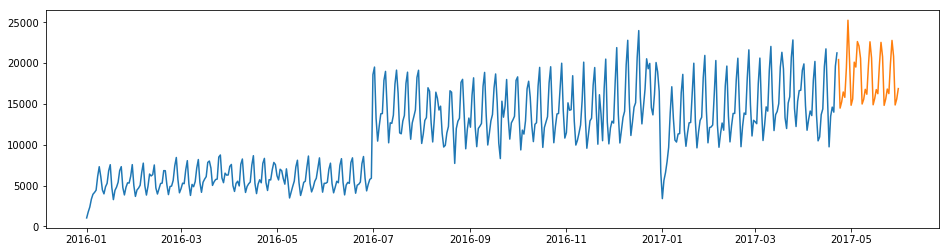

In [15]:
do_experiment(get_pipeline_and_params_lr)

### Random Forest

In [25]:
def get_pipeline_and_params_rf1():    
    pipeline = Pipeline([
        ('rf', RandomForestRegressor()),       
    ])
    parameters = {        
        'rf__n_estimators': np.arange(10, 100, 20),
        'rf__max_features': ['auto', 'sqrt', 'log2']
    }
    return pipeline, parameters

In [17]:
def get_pipeline_and_params_rf2():    
    pipeline = Pipeline([
        ('rf', RandomForestRegressor()),       
    ])
    parameters = {        
        'rf__n_estimators': [90],
        'rf__max_features': ['log2']
    }
    return pipeline, parameters

done in 30.620s
Best score: -0.8557
Best parameters set:
	rf__max_features: 'auto'
	rf__n_estimators: 10


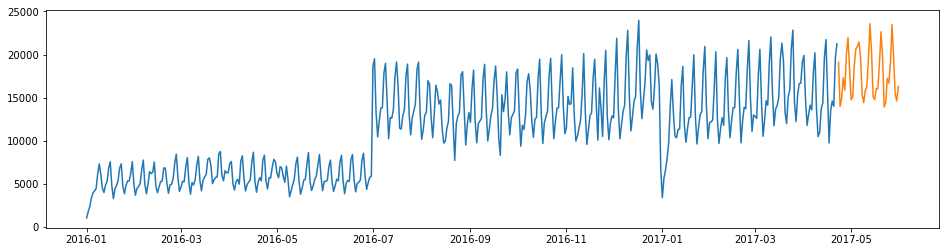

In [22]:
do_experiment(get_pipeline_and_params_rf1)

done in 77.759s
Best score: -0.7941
Best parameters set:
	rf__max_features: 'log2'
	rf__n_estimators: 90
Prediction saved to prediction/prediction-2018-01-06-21-59-58.csv


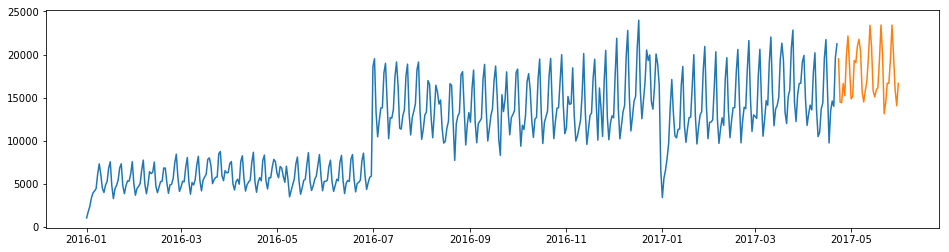

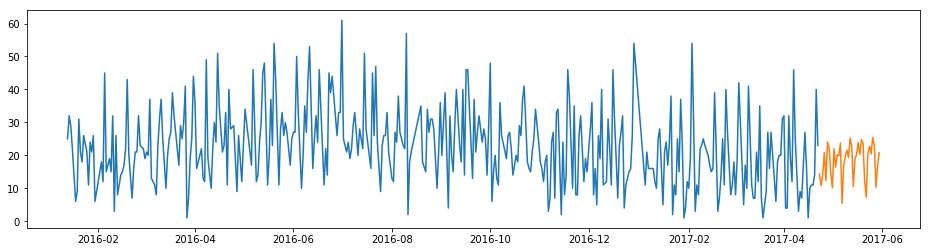

In [46]:
do_experiment(get_pipeline_and_params_rf2)

/home/astar/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


done in 656.180s
Best score: -0.7961
Best parameters set:
	rf__max_features: 'log2'
	rf__n_estimators: 70


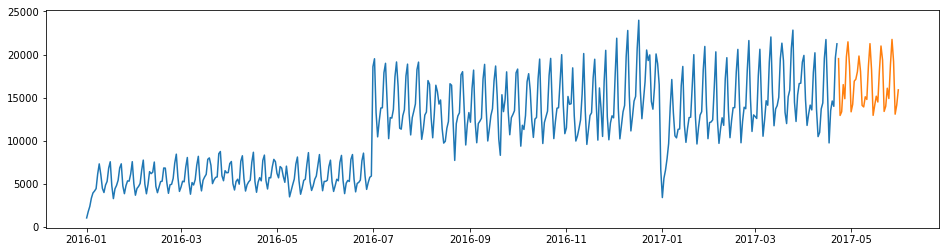

In [26]:
do_experiment(get_pipeline_and_params_rf1)

### XGBoost

In [36]:
def get_pipeline_and_params_xgb():    
    pipeline = Pipeline([
        ('xgb', xgb.XGBRegressor()),       
    ])
    parameters = {        
        'xgb__n_estimators': [15],        
    }
    return pipeline, parameters

done in 7.795s
Best score: -0.6150
Best parameters set:
	xgb__n_estimators: 15
Prediction saved to prediction/prediction-2018-01-06-21-57-33.csv


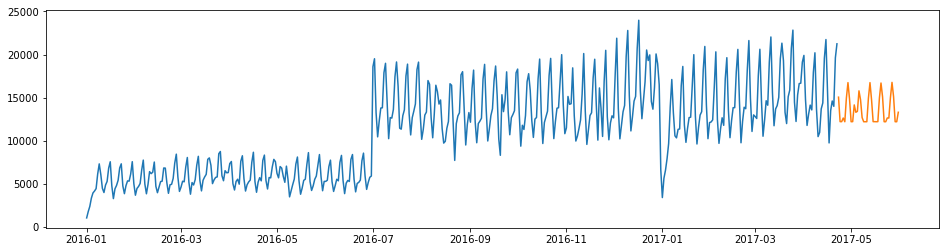

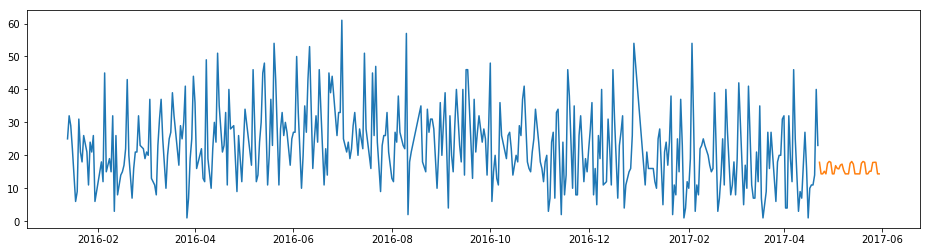

In [45]:
do_experiment(get_pipeline_and_params_xgb)

### SVM

In [51]:
def get_pipeline_and_params_svr():    
    pipeline = Pipeline([
        ('svr', SVR()),       
    ])
    parameters = {        
        'svr__C': [1, 0.1],
        'svr__epsilon': [0.1, 0.01],        
    }
    return pipeline, parameters

In [ ]:
do_experiment(get_pipeline_and_params_svr)